# Importação de bibliotecas 

In [1]:
import matplotlib.pyplot as plt
import PIL.Image as Image
from tqdm import tqdm
import numpy as np
import pathlib
import random 
import cv2
import os

IMG_SHAPE = (64, 64)

In [2]:
DATA_DIR = pathlib.Path('.\\flowers\Processadas')

#                   Entendendo o diretório...

In [6]:
list(DATA_DIR.glob('*/*.jpg'))[:5] #listar as 5 primeiras imagens .jpg do diretório

[WindowsPath('flowers/Processadas/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('flowers/Processadas/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('flowers/Processadas/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('flowers/Processadas/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('flowers/Processadas/daisy/10437770546_8bb6f7bdd3_m.jpg')]

In [3]:
image_count = (len(list(DATA_DIR.glob('*/*.jpg'))))
print(image_count) #temos 1735 imagens no diretório

1735


In [5]:
roses = list(DATA_DIR.glob('rose/*'))
roses[:5] #listar as 5 primeiras imagens da pasta rose

[WindowsPath('flowers/Processadas/rose/10090824183_d02c613f10_m.jpg'),
 WindowsPath('flowers/Processadas/rose/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('flowers/Processadas/rose/10503217854_e66a804309.jpg'),
 WindowsPath('flowers/Processadas/rose/118974357_0faa23cce9_n.jpg'),
 WindowsPath('flowers/Processadas/rose/11944957684_2cc806276e.jpg')]

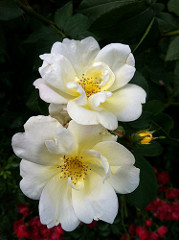

In [6]:
Image.open(str(roses[0])) #mostrar a primeira imagem da pasta rose

# Setup

In [39]:
flowers_image_dict = {   #conjunto "nome da flor" terá todas as imagens da pasta correspondente
    'roses' : list(DATA_DIR.glob('rose/*')),     
    'daisy' : list(DATA_DIR.glob('daisy/*')), 
    'dandelion' : list(DATA_DIR.glob('dandelion/*')),
    'sunflower' : list(DATA_DIR.glob('sunflower/*')),
    'tulips': list(DATA_DIR.glob('tulip/*')),
}

In [9]:
flowers_labels_dict = {   #configurar uma label para cada tipo de flor
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflower' : 3,
    'tulips' : 4,
}

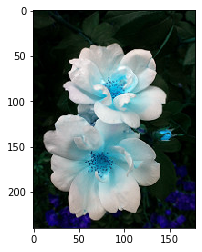

In [36]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
plt.imshow(img, cmap = 'viridis')

## Criando os Data Sets

In [44]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
    for image in tqdm(images):
        try:
            img = cv2.imread(str(image))
            resized_img = cv2.resize(img, IMG_SHAPE)
            X.append(resized_img)
            y.append(flowers_labels_dict[flower_name])
        except Exception as e:
                pass
            
X = np.array(X)
y = np.array(y)

100%|███████████████████████████████████████████████████████████████████████████████| 361/361 [00:00<00:00, 504.83it/s]


##### Nota-se dos resultados acima, que 382 é o número de imagens de rosas, 334 o npumero de imagens de margaridas, 383 de dente-de-leão, 275 de girassóis e 361 de tulipas. Sendo assim, foi gerado os dois banco de dados, um X contendo as imagens redimensionadas e um y contendo as labels 

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.30)

In [46]:
print ('O tamnaho do conjunto de treino é:  {} -> {} imagens, de tamanho {}'.format(X_train.shape, X_train.shape[0], IMG_SHAPE))
print ('O tamnaho do conjunto de teste é:  {}'.format(X_test.shape))

O tamnaho do conjunto de treino é:  (1214, 64, 64, 3) -> 1214 imagens, de tamanho (64, 64)
O tamnaho do conjunto de teste é:  (521, 64, 64, 3)


## Normalização dos pixels das imagens

In [47]:
X_train = X_train / 255
X_test = X_test / 255

# Função para verificar imagens

In [48]:
classes = ['ROSA', 'MARGARIDA', 'DENTE-DE-LEÃO', 'GIRASSOL', 'TULIPA']

def plt_sample(X, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

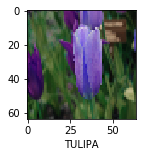

In [51]:
plt_sample(X_train, y_train, 0)

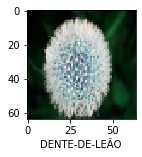

In [57]:
plt_sample(X_train, y_train, 55)

# Framework

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization

##### Nossos dados de label não são gerados como codificação one-hot então não segueo caso de utilizarmos o                   loss = "categorical_crossentropy", e sim, como temos uma label específica para cada tipo de flor criada no dicionário no Setup, iremosutilizar loss = "sparse_categorical_crossentropy". 

In [61]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 32, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 128, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())  #converter para um vetor coluna

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(5))  #5 categorias
model.add(Activation('softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 20, batch_size = 8, validation_split = 0.15, verbose = 2)

Train on 1031 samples, validate on 183 samples
Epoch 1/20
1031/1031 - 7s - loss: 1.7583 - acc: 0.3715 - val_loss: 1.6996 - val_acc: 0.2568
Epoch 2/20
1031/1031 - 6s - loss: 1.4714 - acc: 0.4462 - val_loss: 4.1301 - val_acc: 0.2568
Epoch 3/20
1031/1031 - 14s - loss: 1.2997 - acc: 0.4947 - val_loss: 2.1606 - val_acc: 0.4262
Epoch 4/20
1031/1031 - 14s - loss: 1.2367 - acc: 0.5092 - val_loss: 2.1944 - val_acc: 0.3497
Epoch 5/20
1031/1031 - 7s - loss: 1.1225 - acc: 0.5267 - val_loss: 1.7022 - val_acc: 0.3989
Epoch 6/20
1031/1031 - 8s - loss: 1.0532 - acc: 0.5790 - val_loss: 1.2257 - val_acc: 0.5628
Epoch 7/20
1031/1031 - 16s - loss: 1.0413 - acc: 0.5732 - val_loss: 1.3074 - val_acc: 0.5410
Epoch 8/20
1031/1031 - 11s - loss: 1.0210 - acc: 0.5897 - val_loss: 1.1386 - val_acc: 0.5902
Epoch 9/20
1031/1031 - 7s - loss: 0.9950 - acc: 0.5926 - val_loss: 0.9505 - val_acc: 0.6557
Epoch 10/20
1031/1031 - 8s - loss: 0.9878 - acc: 0.5858 - val_loss: 1.1386 - val_acc: 0.5301
Epoch 11/20
1031/1031 - 17s 

# Avaliação

In [78]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print ('\nO loss do nosso projeto é : {:.2f}, enquanto que a acurácia foi de: {:.2f}'.format(test_loss, test_acc))

521/521 - 0s - loss: 0.9446 - acc: 0.6353

O loss do nosso projeto é : 0.94, enquanto que a acurácia foi de: 0.64


# Predições

In [90]:
y_pred = model.predict(X_test)
y_class = [np.argmax(element) for element in y_pred]
print('A categoria prevista para flor escolhida é: ', y_class[123])

A categoria prevista para flor escolhida é:  4


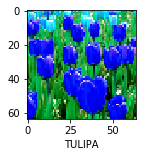

In [91]:
plt_sample(X_test, y_test, 123)

# Para um número maior de exemplos...

In [94]:
print('Temos as seguintes previsões para 10 exemplos: ', y_class[37:47])

Temos as seguintes previsões para 10 exemplos:  [4, 4, 4, 4, 0, 0, 2, 3, 1, 2]


In [96]:
print('Temos as corretas categorias para 10 exemplos: ', y_test[37:47])

Temos as corretas categorias para 10 exemplos:  [4 4 3 4 0 4 2 3 1 1]


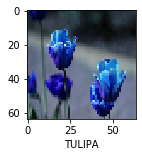

In [95]:
plt_sample(X_test, y_test, 38)

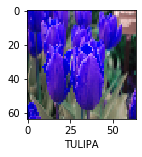

In [101]:
plt_sample(X_test, y_test, 42)

##### No caso acima,pode-se notar que a categoria verdadeira é Tulipa - 4, mas o algoritmo previu sendo 0, ou seja uma rosa.